# Adrien HANS & Tanguy JEANNEAU
# TP1 - ensemble Learning

## Exercice 1 : Combinaison de classifieurs par vote majoritaire

### 1) 

In [141]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns

### 2)

pour la classe DecisionTreeClassifier, limitez la profondeur de l’arbre à 5

In [86]:
#help(DecisionTreeClassifier)
DTC=DecisionTreeClassifier(max_depth=5)

pour la classe GaussianNB, choisissez tous les paramètres à leur valeur par défaut

In [117]:
GNB = GaussianNB()

pour la classe KNeighborsClassifier, choisissez le nombre de voisin(s) n_neighbors à 1

In [88]:
KNC=KNeighborsClassifier(n_neighbors=1)

### 3) 

In [29]:
(Y,c) = make_moons(n_samples=300,noise=0.3, random_state=11)

Affichez ce dataset à l’aide de la fonction scatter du module matplotlib.pyplot. 

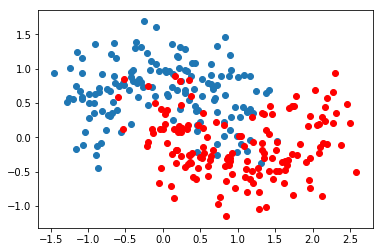

In [30]:
plt.scatter(Y[c==0][:,0], Y[c==0][:,1])
plt.scatter(Y[c==1][:,0], Y[c==1][:,1],color='r')
plt.show()

### 4)

In [ ]:
import random

In [67]:
"""
split_train_test(data,k=5)
splits data into 5 parts"""
def split_train_test(Y, c,k=5):
    n=Y.shape[0]
    return (np.array([Y[int(i*n/k):int((i+1)*n/k)] for i in range(0,k)]), 
            np.array([c[int(i*n/k):int((i+1)*n/k)] for i in range(0,k)]))
Y_split, c_split = split_train_test(Y, c)

### 5)

In [132]:
from sklearn.ensemble import VotingClassifier as VC

In [138]:
Y_split, c_split = split_train_test(Y, c)
results = {'DTC': {'models': [], 'scores': []},
           'GNB': {'models': [], 'scores': []},
           'KNC': {'models': [], 'scores': []},
           'Fusion': {'models': [], 'scores' : []}}
for i in range(0,5):
    Y_train = np.append(Y_split[0:i], Y_split[i:4], axis=0)
    Y_train = Y_train.reshape(4*60, 2)
    Y_test = Y_split[i]
    
    c_train = np.append(c_split[0:i], c_split[i:4], axis=0)
    c_train = c_train.reshape(4*60)
    c_test = c_split[i]
    
    #DecisionTreeClassifier
    DTC=DecisionTreeClassifier(max_depth=5)
    DTC.fit(Y_train, c_train)
    results['DTC']['models'].append(DTC)
    results['DTC']['scores'].append(DTC.score(Y_test, c_test))
    #GaussianNB
    GNB = GaussianNB()
    GNB.fit(Y_train, c_train)
    results['GNB']['models'].append(GNB)
    results['GNB']['scores'].append(GNB.score(Y_test, c_test))
    #KNeighborsClassifier
    KNC=KNeighborsClassifier(n_neighbors=1)
    KNC.fit(Y_train, c_train)
    results['KNC']['models'].append(KNC)
    results['KNC']['scores'].append(KNC.score(Y_test, c_test))
    #Fusion 
    Fusion=VC([('DTC', DTC),('GNB', GNB),('KNC',KNC)])
    Fusion.fit(Y_train, c_train)
    results['Fusion']['models'].append(Fusion)
    results['Fusion']['scores'].append(Fusion.score(Y_test, c_test))

Affichage des resultats : 

In [139]:
def frontieres(clf, X=Y):
    h = .02
    x1_min, x1_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    x2_min, x2_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    x11, x22 = np.meshgrid(np.arange(x1_min, x1_max, h),np.arange(x2_min, x2_max, h))
    if hasattr(clf, "decision_function"):
        Z = clf.decision_function(np.c_[x11.ravel(), x22.ravel()])
    else:
        Z = clf.predict(np.c_[x11.ravel(), x22.ravel()])
    Z=Z.reshape(x11.shape)
    plt.contourf(x11, x22, Z, cmap=plt.cm.bwr, alpha=.8)

### 7) 

In [131]:
"""
def vote_maj(List_model,i):
    Y_test = Y_split[i]
    A=np.zeros(Y_test.shape[0])
    for clf in List_model:
        A+=clf.predict(Y_test)
    return A>=len(List_model)/2
"""

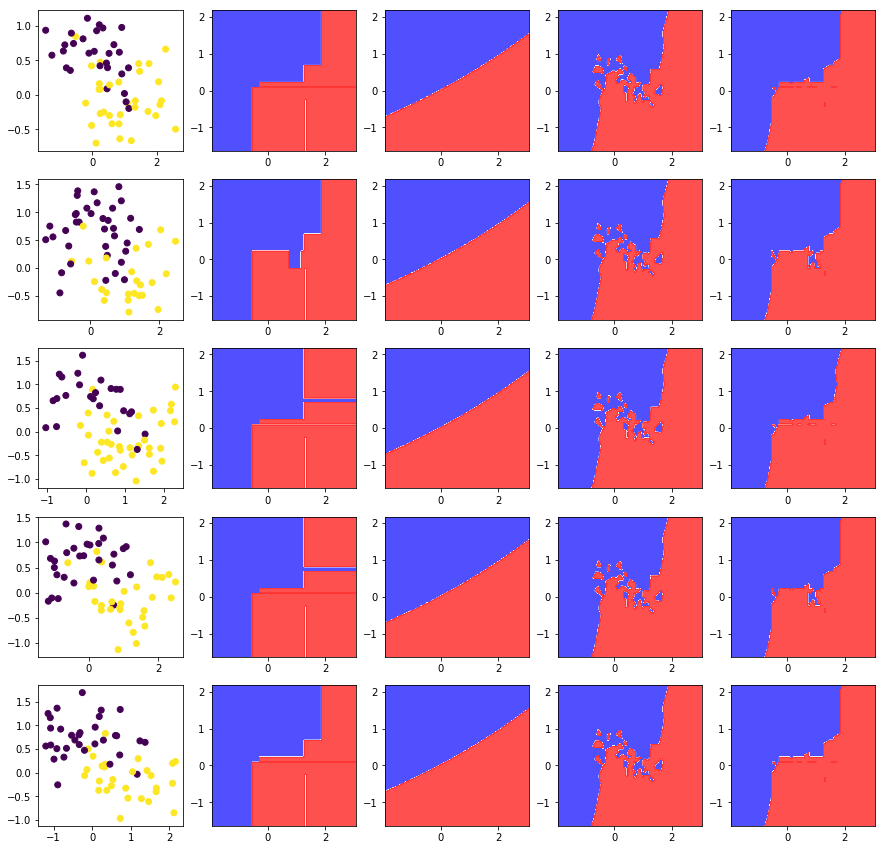

In [140]:
fig = plt.figure(figsize=(15, 15))
for i in range(0,5):
    plt.subplot(5,5, 5*i +1)
    plt.scatter(Y_split[i,:,0], Y_split[i,:,1], c=c_split[i])
    plt.subplot(5,5, 5*i +2)
    frontieres(results['DTC']['models'][i])
    plt.subplot(5,5, 5*i +3)
    frontieres(results['GNB']['models'][i])
    plt.subplot(5,5, 5*i +4)
    frontieres(results['KNC']['models'][i])
    plt.subplot(5,5, 5*i +5)
    frontieres(results['Fusion']['models'][i])

### 8)

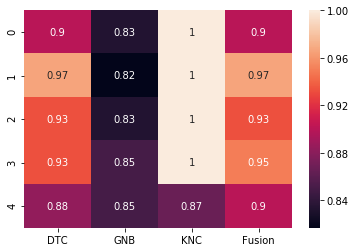

In [165]:
scores_matrix = []
models=list((results.keys()))
for model in models:
    scores_matrix.append(results[model]['scores'])
scores_matrix = np.array(scores_matrix).T
sns.heatmap(scores_matrix, annot=True, xticklabels=models)